In [2]:
import pandas as pd
import numpy as np
from ggplot import *

/home/ubuntu/.local/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,


In [3]:
df = pd.read_csv("Agg_tot.csv")

df.head()

,Year,STATE,STATE2,COUNTY,RACE2,AGE5YR,SEX,count,binge,smoke,droc,AGE
0,2002,1,ALABAMA,Jefferson County,European,1,Male,11,6,6,336,18-24
1,2002,1,ALABAMA,Jefferson County,European,1,Female,10,5,4,170,18-24
2,2002,1,ALABAMA,Jefferson County,European,2,Male,6,5,5,238,25-29
3,2002,1,ALABAMA,Jefferson County,European,2,Female,15,1,2,133,25-29
4,2002,1,ALABAMA,Jefferson County,European,3,Male,11,6,6,343,30-34


In [277]:
## 연령별, 성별, 인종별 분석을 위해 그룹
group_race = df.groupby(['AGE5YR', 'SEX', 'RACE2'])

race_alc1 = group_race['droc'].sum() / group_race['count'].sum()/100
race_alc2 = group_race['binge'].sum() / group_race['count'].sum()
race_smk = group_race['smoke'].sum() / group_race['count'].sum()

race_alc1 = pd.DataFrame({'alc1' : race_alc1}).reset_index()
race_alc2 = pd.DataFrame({'alc2' : race_alc2}).reset_index()
race_smk = pd.DataFrame({'smk' : race_smk}).reset_index()

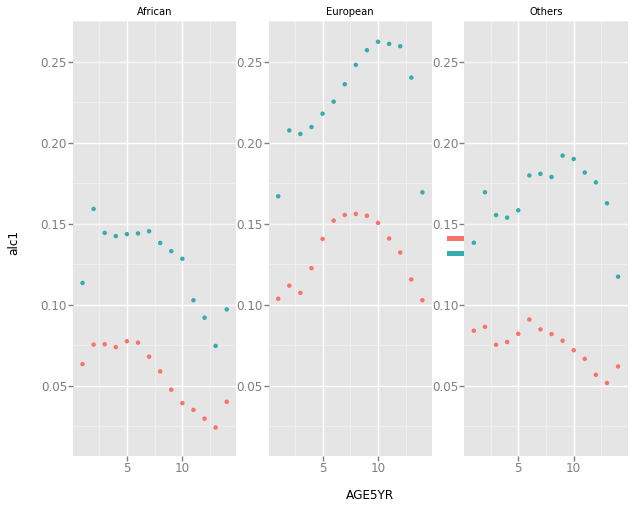

<ggplot: (8780077984432)>

In [295]:
# Vis1 - 연령별, 성별, 인종별 음주소비량

ggplot(aes(x='AGE5YR', y='alc1', color='SEX'), data=race_alc1) + geom_point() + facet_wrap('RACE2', nrow=1 ) 

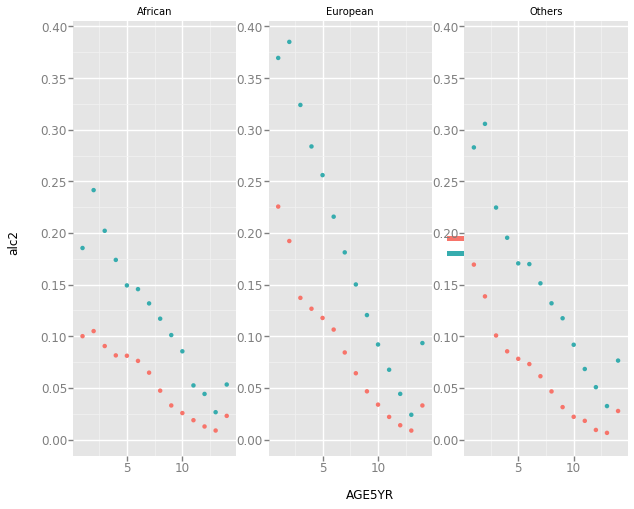

<ggplot: (-9223363256776198933)>

In [279]:
# Vis2 - 연령별, 성별, 인종별 과음 비율

ggplot(aes(x='AGE5YR', y='alc2', color='SEX'), data=race_alc2) + geom_point() + facet_wrap('RACE2', nrow=1 )

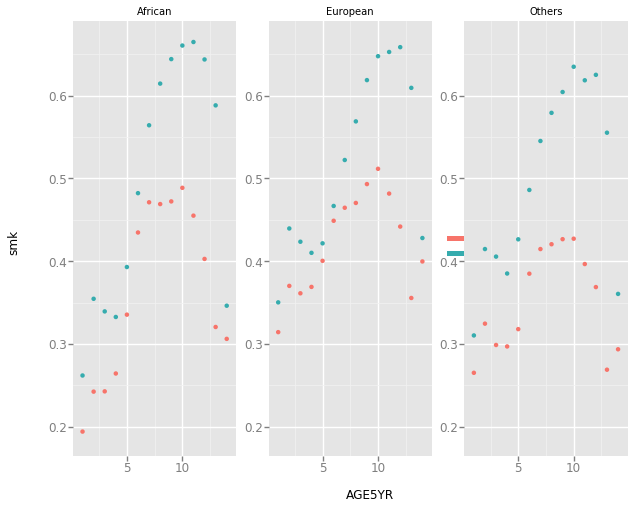

<ggplot: (-9223363256776252451)>

In [280]:
# Vis3 - 연령별, 성별, 인종별 흡연 비율

ggplot(aes(x='AGE5YR', y='smk', color='SEX'), data=race_smk) + geom_point() + facet_wrap('RACE2', nrow=1 )

In [4]:
## 2002, 2012 10년의 텀을 비교하기 위해 데이터 분할
group2002 = df[ df['Year'] == 2002].groupby(['AGE', 'SEX'])
group2012 = df[df['Year'] == 2012].groupby(['AGE', 'SEX'])

alc1_2002 = group2002['droc'].sum() / group2002['count'].sum() / 100
alc1_2012 = group2012['droc'].sum() / group2012['count'].sum() / 100

alc2_2002 = group2002['binge'].sum() / group2002['count'].sum()
alc2_2012 = group2012['binge'].sum() / group2012['count'].sum()

smk_2002 = group2002['smoke'].sum() / group2002['count'].sum()
smk_2012 = group2012['smoke'].sum() / group2012['count'].sum()

alc1_2002 = pd.DataFrame({'alc1' : alc1_2002}).reset_index()
alc1_2012 = pd.DataFrame({'alc1' : alc1_2012}).reset_index()

alc2_2002 = pd.DataFrame({'alc2' : alc2_2002}).reset_index()
alc2_2012 = pd.DataFrame({'alc2' : alc2_2012}).reset_index()

smk_2002 = pd.DataFrame({'smk' : smk_2002}).reset_index()
smk_2012 = pd.DataFrame({'smk' : smk_2012}).reset_index()

alc1_2002['Year'] = '2002'
alc1_2012['Year'] = '2012'
alc2_2002['Year'] = '2002'
alc2_2012['Year'] = '2012'
smk_2002['Year'] = '2002'
smk_2012['Year'] = '2012'

In [5]:
## 연령별, 성별 그룹
group = df.groupby(['AGE', 'SEX'])
agesex_alc1 = group['droc'].sum() / group['count'].sum() / 100
agesex_alc2 = group['binge'].sum() / group['count'].sum()
agesex_smk = group['smoke'].sum() / group['count'].sum()

agesex_alc1 = pd.DataFrame({'alc1' : agesex_alc1}).reset_index()
agesex_alc2 = pd.DataFrame({'alc2' : agesex_alc2}).reset_index()
agesex_smk = pd.DataFrame({'smk' : agesex_smk}).reset_index()

agesex_alc1['SEX'] = agesex_alc1['SEX'].apply(str)
agesex_alc2['SEX'] = agesex_alc2['SEX'].apply(str)
agesex_smk['SEX'] = agesex_smk['SEX'].apply(str)

agesex_alc1['Year'] = 'ALL'
agesex_alc2['Year'] = 'ALL'
agesex_smk['Year'] = 'ALL'

agesex_alc1.dtypes

new1 = pd.concat([alc1_2002, alc1_2012, agesex_alc1], ignore_index= True)
new2 = pd.concat([alc2_2002, alc2_2012, agesex_alc2], ignore_index= True)
new3 = pd.concat([smk_2002, smk_2012, agesex_smk], ignore_index= True)

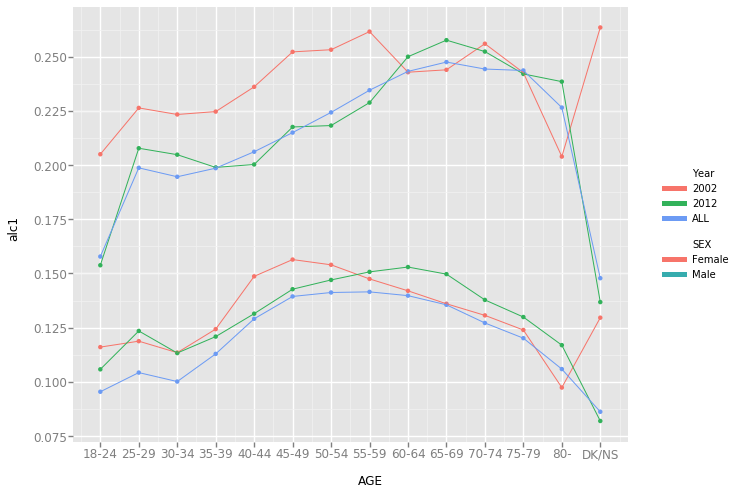

<ggplot: (8780078007588)>

In [297]:
# Vis4 - 2002년, 2012년 연령별 음주량
# 음주 가능 나이가 21세이기 때문에 18-24의 음주량이 낮음
ggplot(aes(x='AGE', y ='alc1', color='Year',fill='SEX'), data=new1) + geom_point() + geom_line()

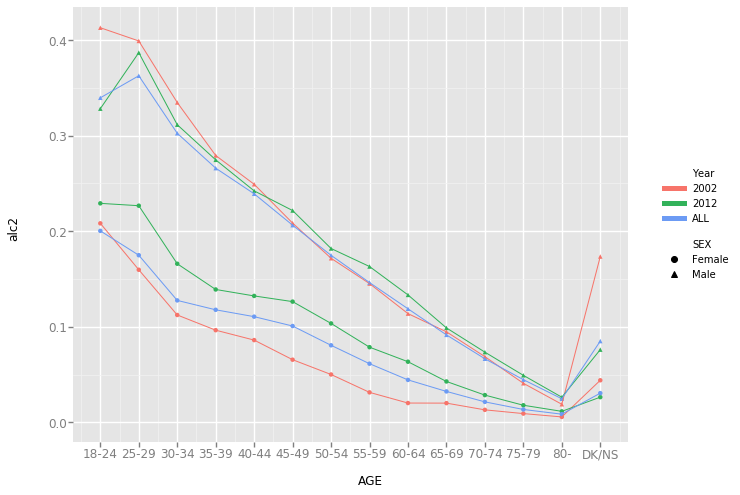

<ggplot: (-9223363256776946414)>

In [298]:
# Vis5 - 2002년, 2012년 연령별 과음 비율
ggplot(aes(x='AGE', y ='alc2', color='Year',shape='SEX'), data=new2) + geom_point() + geom_line()

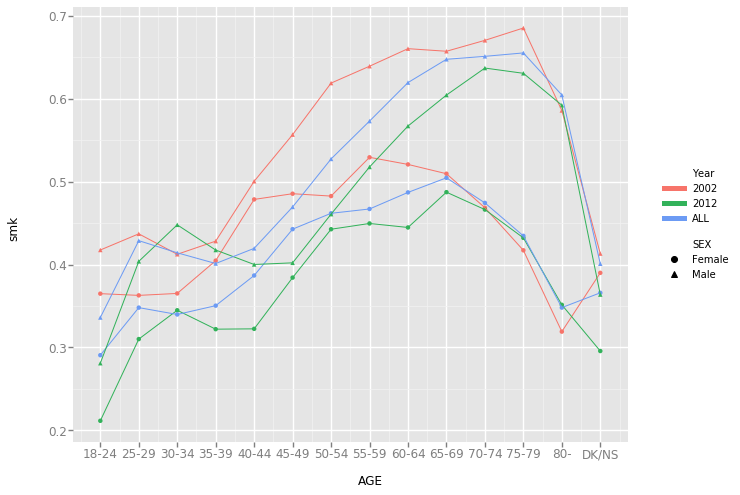

<ggplot: (-9223363256776813070)>

In [296]:
# Vis4 - 2002년, 2012년 연령별 흡연 비율
ggplot(aes(x='AGE', y ='smk', color='Year',shape='SEX'), data=new3) + geom_point() + geom_line()

In [6]:
# 대표 9개 주에 대해 관찰하기 위해 파티션
df_partition = df[df['STATE'].isin([6, 15, 35, 9, 19, 49, 13, 26, 53])]
df_partition2002 = df[df['STATE'].isin([6, 15, 35, 9, 19, 49, 13, 26, 53]) & (df['Year'] == 2002)]
df_partition2012 = df[df['STATE'].isin([6, 15, 35, 9, 19, 49, 13, 26, 53]) & (df['Year'] == 2012)]

In [7]:
group2002 = df_partition2002.groupby(['STATE2', 'AGE5YR', 'SEX'])
group2012 = df_partition2012.groupby(['STATE2', 'AGE5YR', 'SEX'])
groupALL = df_partition.groupby(['STATE2', 'AGE5YR', 'SEX'])

groupALL_alc1 = groupALL['droc'].sum() / groupALL['count'].sum() / 100
groupALL_alc2 = groupALL['binge'].sum() / groupALL['count'].sum() 
groupALL_smk = groupALL['smoke'].sum() / groupALL['count'].sum()

st2002_age_sex_alc1 = group2002['droc'].sum() / group2002['count'].sum() / 100
st2002_age_sex_alc2 = group2002['binge'].sum() / group2002['count'].sum() 
st2002_age_sex_smk = group2002['smoke'].sum() / group2002['count'].sum()

st2012_age_sex_alc1 = group2012['droc'].sum() / group2012['count'].sum() / 100
st2012_age_sex_alc2 = group2012['binge'].sum() / group2012['count'].sum() 
st2012_age_sex_smk = group2012['smoke'].sum() / group2012['count'].sum()

groupALL_alc1 = pd.DataFrame({'alc1' : groupALL_alc1}).reset_index()
groupALL_alc2 = pd.DataFrame({'alc2' : groupALL_alc2}).reset_index()
groupALL_smk = pd.DataFrame({'smk' : groupALL_smk}).reset_index()

st2002_age_sex_alc1 = pd.DataFrame({'alc1' : st2002_age_sex_alc1}).reset_index()
st2002_age_sex_alc2 = pd.DataFrame({'alc2' : st2002_age_sex_alc2}).reset_index()
st2002_age_sex_smk = pd.DataFrame({'smk' : st2002_age_sex_smk}).reset_index()

st2012_age_sex_alc1 = pd.DataFrame({'alc1' : st2012_age_sex_alc1}).reset_index()
st2012_age_sex_alc2 = pd.DataFrame({'alc2' : st2012_age_sex_alc2}).reset_index() 
st2012_age_sex_smk = pd.DataFrame({'smk' : st2012_age_sex_smk}).reset_index()

st2002_age_sex_alc1.head(3)

,STATE2,AGE5YR,SEX,alc1
0,CALIFORNIA,1,Female,0.070980
1,CALIFORNIA,1,Male,0.073333
2,CALIFORNIA,2,Female,0.127826


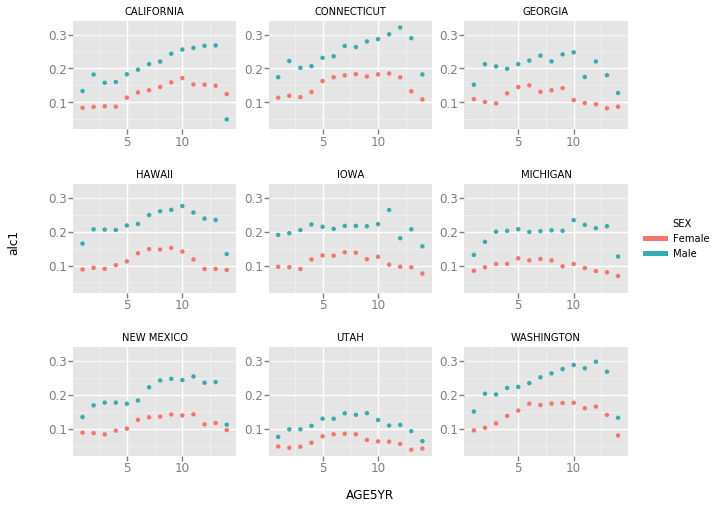

<ggplot: (8780079369662)>

In [265]:
# Vis7 - (모든 기간) 주별 연령별 음주량
ggplot(aes(x='AGE5YR', y='alc1', color='SEX'), data=groupALL_alc1) + geom_point() + facet_wrap('STATE2')

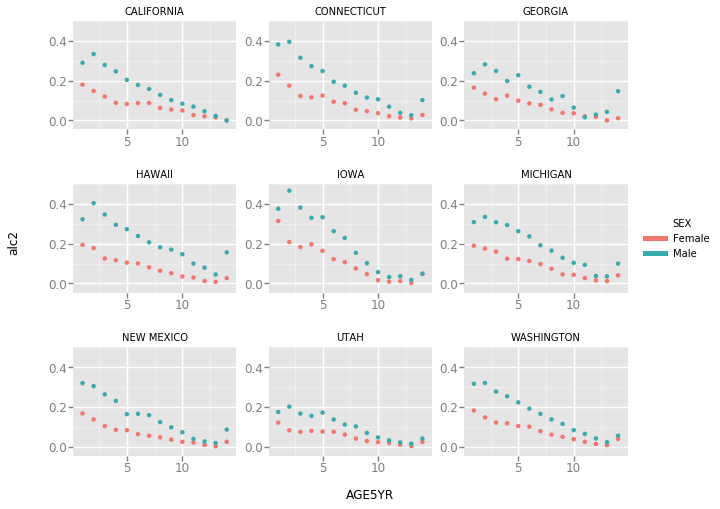

<ggplot: (8780079263836)>

In [266]:
# Vis8 - (모든 기간) 주별 연령별 과음 비율
ggplot(aes(x='AGE5YR', y='alc2', color='SEX'), data=groupALL_alc2) + geom_point() + facet_wrap('STATE2')

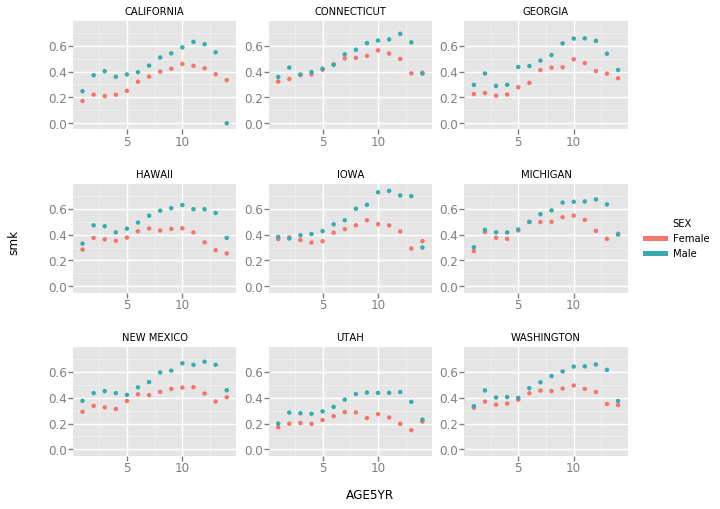

<ggplot: (-9223363268735720658)>

In [9]:
# Vis9 - (모든 기간) 주별 연령별 흡연 비율
ggplot(aes(x='AGE5YR', y='smk', color='SEX'), data=groupALL_smk) + geom_point() + facet_wrap('STATE2')